In [27]:
!pip install pandas
import pandas as pd

defillama_stablecoins_path = './data/defillama_stablecoins.csv'
rwa_stablecoin_xyz_path = './data/rwa_stablecoin_xyz.csv'

defillama_df = pd.read_csv(defillama_stablecoins_path)
rwa_df = pd.read_csv(rwa_stablecoin_xyz_path)



Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [28]:
defillama_df.head()



,Timestamp,Date,USDT,USDC,USTC,BUSD,DAI,FRAX,TUSD,LUSD,...,EURD,XUSD,ULTRA,USDCB,cgUSD,fETH,fxUSD,GAI,EURO3,Total
0,1617148800,2021-03-31,4.072640e+10,1.091108e+10,1.606224e+09,3.583389e+09,3.015418e+09,1.112374e+08,3.295572e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.270884e+10
1,1617235200,2021-04-01,4.082866e+10,1.081464e+10,1.620057e+09,3.481946e+09,3.009058e+09,1.125756e+08,3.278335e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.265331e+10
2,1617321600,2021-04-02,4.086523e+10,1.087159e+10,1.647230e+09,3.527311e+09,2.965694e+09,1.122272e+08,3.217319e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.275346e+10
3,1617408000,2021-04-03,4.181313e+10,1.090838e+10,1.663062e+09,3.826085e+09,3.041816e+09,1.170263e+08,3.288199e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.632674e+10
4,1617494400,2021-04-04,4.247584e+10,1.076522e+10,1.673207e+09,3.955678e+09,3.059450e+09,1.129356e+08,3.152856e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.700625e+10


In [29]:
rwa_df = (
    rwa_df.assign(
        market_cap=rwa_df['market_cap'].replace('[\$,]', '', regex=True).astype(float),
        tbills_amount_est=rwa_df['tbills_amount_est'].replace('[\$,]', '', regex=True).astype(float)
    )
    .assign(tbill_pct=lambda x: x['tbills_amount_est'] / x['market_cap'])
    .pipe(
        lambda x: x[(
            list(x.columns[:x.columns.get_loc('price')]) +
            ['tbill_pct'] +
            list(x.columns[x.columns.get_loc('price'):-1])
        )]
    )
)



,name,ticker,networks,market_cap,tbills_amount_est,tbill_pct,price,pegged_currency,underlying_assets,underlying_assets_tbills,incorporation_country,regulatory,rating_by_bluechip,weekly_active_addresses,weekly_transfer_volume,contract_addresses
0,Tether USD,USDT,NaN,1.043586e+11,6.785047e+10,0.650166,0.9995,US Dollar,Money Market - Fund+ 6 More,us_treasury_debt,Hong Kong,FinCEN - Financial Crimes Enforcement Network,D,"3,270,262","144,117,337,923",4 Addresses
1,Circle USD Coin,USDC,NaN,2.673938e+10,7.391264e+09,0.276419,0.9993,US Dollar,Money Market - Fund+ 3 More,us_treasury_debt,United States of America,FinCEN - Financial Crimes Enforcement Network,B+,"564,482","164,698,867,553",8 Addresses
2,MakerDAO Dai,DAI,NaN,3.193386e+09,1.680000e+09,0.526087,0.9993,US Dollar,Structured Credit+ 4 More,us_treasury_debt,NaN,NaN,B+,"9,752","17,641,832,182",0x6b1...271d0f
3,First Digital Labs USD,FDUSD,NaN,2.921742e+09,4.053000e+08,0.138719,0.9987,US Dollar,Money Market - RRP+ 2 More,us_treasury_debt,Hong Kong,NaN,C,122,"4,661,416,130",0xc5f...e16409
4,Techteryx TrueUSD,TUSD,NaN,1.181063e+09,NaN,NaN,1.0000,US Dollar,Money Market - Fund+ 2 More,us_treasury_debt,British Virgin Islands,NaN,D,546,"22,993,645",2 Addresses


In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt



In [34]:
rwa_df.head()

,name,ticker,networks,market_cap,tbills_amount_est,tbill_pct,price,pegged_currency,underlying_assets,underlying_assets_tbills,incorporation_country,regulatory,rating_by_bluechip,weekly_active_addresses,weekly_transfer_volume,contract_addresses
0,Tether USD,USDT,NaN,104358.614226,67850.470784,0.650166,0.9995,US Dollar,Money Market - Fund+ 6 More,us_treasury_debt,Hong Kong,FinCEN - Financial Crimes Enforcement Network,D,"3,270,262","144,117,337,923",4 Addresses
1,Circle USD Coin,USDC,NaN,26739.379540,7391.263608,0.276419,0.9993,US Dollar,Money Market - Fund+ 3 More,us_treasury_debt,United States of America,FinCEN - Financial Crimes Enforcement Network,B+,"564,482","164,698,867,553",8 Addresses
2,MakerDAO Dai,DAI,NaN,3193.386019,1680.000000,0.526087,0.9993,US Dollar,Structured Credit+ 4 More,us_treasury_debt,NaN,NaN,B+,"9,752","17,641,832,182",0x6b1...271d0f
3,First Digital Labs USD,FDUSD,NaN,2921.741503,405.300000,0.138719,0.9987,US Dollar,Money Market - RRP+ 2 More,us_treasury_debt,Hong Kong,NaN,C,122,"4,661,416,130",0xc5f...e16409
4,Techteryx TrueUSD,TUSD,NaN,1181.062581,NaN,NaN,1.0000,US Dollar,Money Market - Fund+ 2 More,us_treasury_debt,British Virgin Islands,NaN,D,546,"22,993,645",2 Addresses


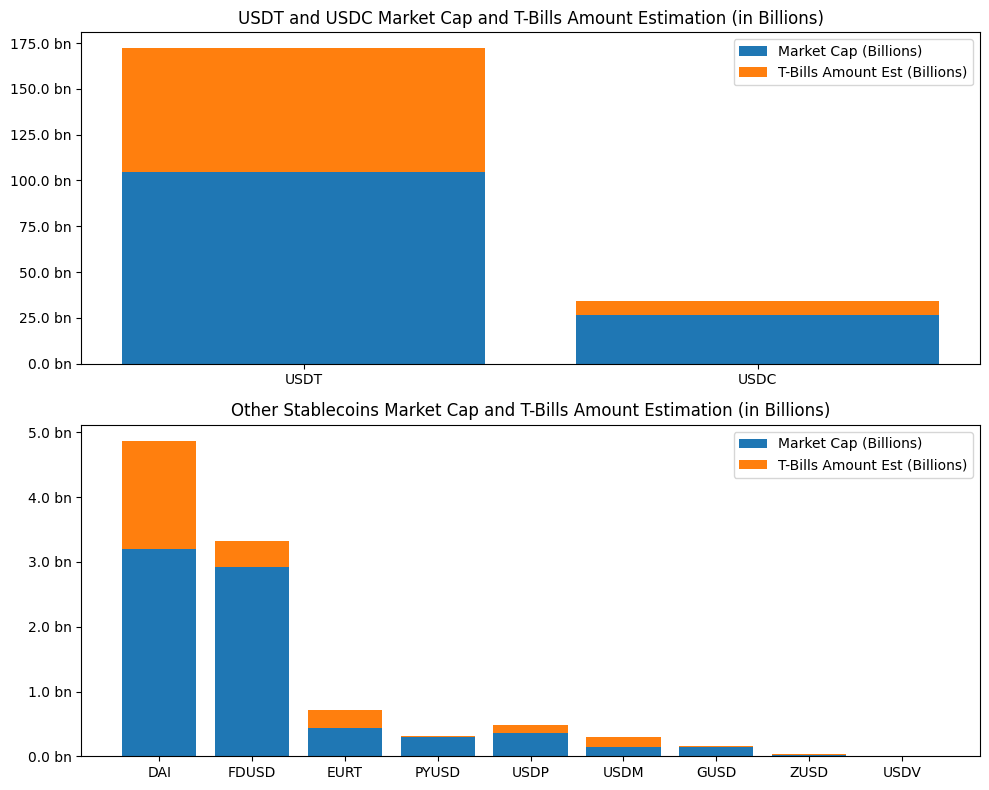

In [35]:
# Convert market_cap and tbills_amount_est to billions for plotting
rwa_df['market_cap'] = rwa_df['market_cap'] /1000  # Convert to billions
rwa_df['tbills_amount_est'] = rwa_df['tbills_amount_est'] /1000   # Convert to billions

# Filter the DataFrame to include only rows where 'tbills_amount_est' is not NaN
filtered_df = rwa_df[rwa_df['tbills_amount_est'].notna()]

# Separate the data for USDT and USDC, and other stablecoins
usdt_usdc_df = filtered_df[filtered_df['ticker'].isin(['USDT', 'USDC'])]
other_df = filtered_df[~filtered_df['ticker'].isin(['USDT', 'USDC'])]

# Creating two bar charts: one for USDT and USDC, and one for other stablecoins
# Function to format the tick labels for billions
def billions_formatter(x, pos):
    """Converts tick labels to represent billions with 'bn'"""
    return f'{x} bn'

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# USDT and USDC bar chart
axes[0].bar(usdt_usdc_df['ticker'], usdt_usdc_df['market_cap'], label='Market Cap (Billions)')
axes[0].bar(usdt_usdc_df['ticker'], usdt_usdc_df['tbills_amount_est'], bottom=usdt_usdc_df['market_cap'], label='T-Bills Amount Est (Billions)')
axes[0].set_title('USDT and USDC Market Cap and T-Bills Amount Estimation (in Billions)')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))
axes[0].legend()

# Other stablecoins bar chart
axes[1].bar(other_df['ticker'], other_df['market_cap'], label='Market Cap (Billions)')
axes[1].bar(other_df['ticker'], other_df['tbills_amount_est'], bottom=other_df['market_cap'], label='T-Bills Amount Est (Billions)')
axes[1].set_title('Other Stablecoins Market Cap and T-Bills Amount Estimation (in Billions)')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))
axes[1].legend()

plt.tight_layout()
plt.show()


In [36]:
# divided market_cap and tbills_amount_est by 1000 to get y-axis above to "bn"
rwa_df.head()

,name,ticker,networks,market_cap,tbills_amount_est,tbill_pct,price,pegged_currency,underlying_assets,underlying_assets_tbills,incorporation_country,regulatory,rating_by_bluechip,weekly_active_addresses,weekly_transfer_volume,contract_addresses
0,Tether USD,USDT,NaN,104.358614,67.850471,0.650166,0.9995,US Dollar,Money Market - Fund+ 6 More,us_treasury_debt,Hong Kong,FinCEN - Financial Crimes Enforcement Network,D,"3,270,262","144,117,337,923",4 Addresses
1,Circle USD Coin,USDC,NaN,26.739380,7.391264,0.276419,0.9993,US Dollar,Money Market - Fund+ 3 More,us_treasury_debt,United States of America,FinCEN - Financial Crimes Enforcement Network,B+,"564,482","164,698,867,553",8 Addresses
2,MakerDAO Dai,DAI,NaN,3.193386,1.680000,0.526087,0.9993,US Dollar,Structured Credit+ 4 More,us_treasury_debt,NaN,NaN,B+,"9,752","17,641,832,182",0x6b1...271d0f
3,First Digital Labs USD,FDUSD,NaN,2.921742,0.405300,0.138719,0.9987,US Dollar,Money Market - RRP+ 2 More,us_treasury_debt,Hong Kong,NaN,C,122,"4,661,416,130",0xc5f...e16409
4,Techteryx TrueUSD,TUSD,NaN,1.181063,NaN,NaN,1.0000,US Dollar,Money Market - Fund+ 2 More,us_treasury_debt,British Virgin Islands,NaN,D,546,"22,993,645",2 Addresses
